## step 1 Load library

In [48]:
from numpy import *
import networkx as nx                   
import matplotlib.pyplot as plt 
import pandas as pd
import copy
%matplotlib inline

## step 2 Read Local File

In [49]:
file_number = int(input("Please enter a file name："))
def openFile(file_number):
    data = []
    with open("../data/rawData/"+ str(file_number)+".txt","r") as f:
        data=f.readlines()
    return data

Please enter a file name：4


In [79]:
data = openFile(file_number)
data

['#application\n',
 '#Entity : volterra\n',
 '#nodes\n',
 '46\n',
 '#dependency\n',
 ' 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n',
 ' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n',
 ' 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n',
 ' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n',
 ' 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0\n',
 ' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n',
 ' 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n',
 ' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n',
 ' 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n',
 ' 0 0 0 0 0 0 0 0 0 0 0 

In [51]:
# get node number
'''
for example:
#nodes
3

return 3
'''
node_number = int(data[3])
node_number

46

In [52]:
# get types 
'''
for example:
#types
 0 0 0

return ['0','0','0']
'''
types = data[-1].strip().split(' ')
types

['1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0']

In [53]:
# According to the sequence of IP cores
def seqList(types):
    type_set = set()
    typeSetSeq = []
    for i in types:
        if i not in type_set:
            type_set.add(i)
            typeSetSeq.append(i)
    return typeSetSeq

In [54]:
typeSetSeq = seqList(types)
typeSetSeq

['1', '0']

In [55]:
# Enter n trusted IP cores
while(True):
    n_ip= int(input("Please enter n trusted IP cores:"))
    if n_ip<=len(typeSetSeq):
        break;

Please enter n trusted IP cores:0


## step 3 Create Raw Matrix

In [56]:
# create matrix
'''
 0 1 1
 0 0 0
 0 0 0
'''

raw_matrix = zeros((node_number,node_number),dtype=int)    
print(raw_matrix)

# Get all matrix rows
lines = data[5:-2]
print(lines)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[' 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n', ' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n', ' 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n', ' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n', ' 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0\n', ' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n', ' 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n', ' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n', ' 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n

In [57]:
# get raw matrix
def getMatrix(lines):
    # format list for lines
    raw_matrix_row = 0                      # Represents the rows of the matrix, starting from row 0
    for line in lines:             #Read the data in lines line by line
        list = line.strip().strip('\n').split(' ')      #Process line-by-line data: strip means removing the '\ n' from the head and tail, split means splitting the line data with spaces, and then returning the processed line data to the list
        raw_matrix[raw_matrix_row:] = list[:node_number]                    #Place the processed data in square matrix A. list [0: 3] means that the 0,1,2 columns of the list are placed in the A_row row in matrix A
        raw_matrix_row+=1        #Then continue reading the next row of matrix A                        
        #print(line)

In [58]:
getMatrix(lines)
# print
print(raw_matrix)    

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


## step 4 Matrix transformation and expansion

In [59]:
# Convert to symmetric matrix
def toNoDirectGraph(matrix,n):
    for i in range(n):
        for j in range(n):
            if matrix[i][j]==1:
                matrix[j][i]=matrix[i][j]
    return matrix

In [60]:
# def computeParentNode(matrix,n):
#     raw = matrix
#     for i in range(n):
#         for j in range(i+1,n):
#             for k in range(n):
#                 if matrix[i][k]==1 and matrix[j][k]==1:
#                     raw[i][j]=1
#     return raw
# print(raw_matrix)
# print(computeParentNode(raw_matrix,node_number))
# print(raw_matrix)

In [61]:
# Matrix expansion
def generateMatrix(matrix,n):
    actual_number=n*3
    bigMatrix = zeros((actual_number,actual_number),dtype=int) 
    for i in range(actual_number):
        for j in range(actual_number):
            # Start filling the upper left corner
            if i<n and j<n:
                bigMatrix[i][j]=matrix[i][j]
                # Connecting special relationships
                bigMatrix[i][i+n]=1
                bigMatrix[i][i+2*n]=1
            if i==0 and j<n:    
                bigMatrix[j+n][j+2*n]=1
            # Start expanding the middle section
            if (i>=n and i<2*n) and (j>=n and j<2*n):
                bigMatrix[i][j]=matrix[i-n][j-n]
            # Start expanding the bottom right corner
            if (i>=2*n and i<3*n) and (j>=2*n and j<3*n):
                bigMatrix[i][j]=matrix[i-2*n][j-2*n]
    return bigMatrix

In [62]:
bigMatrix=generateMatrix(raw_matrix,node_number)
print(bigMatrix)

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


In [63]:
bigMatrix = toNoDirectGraph(bigMatrix,3*node_number) 
print(bigMatrix)
print(bigMatrix.shape)

[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 0 1 0]]
(138, 138)


## step 5 Modify the matrix based on the trusted IP core

In [64]:
# time space is O(n)
def getLoc(types,seq):
    # Get the index of the trusted IP core from the type list (actual position -1)
    pos = []
    for i in range(len(types)):
        if types[i] in seq:
            pos.append(i)
    return pos

In [65]:
# Chinese: n如果等于typeSetSeq长度，表示全部ip核受信任,直接计算vendor1的价格,直接调到后面执行vendor计算
# English: If n is equal to the length of typeSetSeq, it means that all IP cores are trusted, and the price of vendor1 is directly calculated, which is directly transferred to the vendor calculation later.

# Chinese: 否则接着往下执行
# English: Otherwise, proceed to the next step

pos=[]

# Some are trusted, some are untrusted, remove trusted IP cores
if n_ip>0 and n_ip<len(typeSetSeq):
    frontSeq  = typeSetSeq[:n_ip]  # Trusted ip core
    print(frontSeq)
    pos = getLoc(types,frontSeq)   # The index of the trusted IP core
    print(pos)
    # Expand pos to triple length
    pos_1 = [i+node_number for i in pos]
    print(pos_1)
    pos_2 = [i+2*node_number for i in pos]
    print(pos_2)
    pos = pos+pos_1+pos_2
    print(pos)   # The index corresponding to the IP core expanded three times
    # Modify bigMatrix
    for i in range(3*node_number):
        if i in pos:
            for j in range(3*node_number):
                bigMatrix[i][j]=0
        else:
            for j in range(3*node_number):
                if j in pos:
                    bigMatrix[i][j]=0
    bigMatrix

In [66]:
bigMatrix

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

## step 6 Create graphs and graph coloring

In [67]:
# takes matrix and creates a undirected graph
def CreateGraph():
    df = pd.DataFrame(bigMatrix)
    # create Graph
    G = nx.from_pandas_adjacency(df)
    return G

In [68]:
G = CreateGraph()

In [69]:
# Find the minimum color needed for coloring
colors = nx.coloring.greedy_color(G, strategy='smallest_last')
print(colors)

colors = [colors[k] for k in sorted(colors.keys())]
print(colors)

{30: 0, 122: 1, 76: 2, 44: 1, 90: 0, 136: 2, 43: 0, 89: 1, 135: 3, 10: 1, 56: 0, 102: 2, 74: 2, 120: 0, 28: 3, 134: 0, 88: 2, 42: 1, 118: 1, 26: 0, 72: 3, 87: 0, 41: 2, 133: 1, 70: 1, 54: 0, 116: 0, 100: 2, 8: 1, 24: 3, 86: 1, 132: 0, 40: 3, 85: 0, 131: 1, 39: 2, 84: 1, 130: 0, 38: 3, 83: 0, 129: 1, 37: 2, 62: 2, 108: 3, 16: 0, 82: 1, 128: 0, 36: 3, 60: 2, 106: 1, 14: 0, 127: 1, 81: 0, 35: 2, 105: 0, 59: 1, 13: 3, 110: 0, 18: 1, 64: 2, 63: 0, 17: 2, 109: 1, 45: 0, 20: 1, 91: 1, 66: 2, 112: 0, 137: 3, 126: 0, 34: 1, 80: 2, 12: 0, 58: 1, 104: 2, 22: 0, 114: 1, 68: 2, 52: 0, 98: 3, 6: 1, 79: 0, 125: 1, 96: 0, 124: 2, 50: 1, 78: 3, 33: 2, 32: 0, 4: 3, 31: 1, 123: 0, 77: 2, 94: 1, 2: 0, 48: 3, 92: 1, 0: 0, 46: 3, 75: 0, 121: 2, 29: 1, 119: 1, 73: 0, 27: 2, 71: 0, 117: 2, 25: 1, 69: 0, 115: 1, 23: 2, 67: 0, 113: 2, 21: 1, 111: 1, 65: 0, 19: 2, 61: 0, 107: 1, 15: 2, 103: 0, 57: 1, 11: 2, 55: 1, 101: 0, 9: 2, 53: 1, 99: 0, 7: 2, 51: 0, 97: 1, 5: 2, 95: 0, 49: 1, 3: 2, 47: 0, 93: 2, 1: 1}
[0, 1

In [70]:
#draws the graph and displays the weights on the edges
def DrawGraph(G,colors):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels = True, node_color = colors, edge_color = 'black' ,width = 1, alpha = 0.7)  #with_labels=true is to show the node number in the output graph

/home/light/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


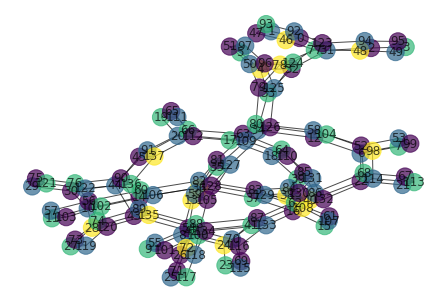

In [71]:
DrawGraph(G,colors)

In [72]:
# Get the minimum number of graph coloring needed
colors_set = set()
for i in colors:
    colors_set.add(i)

minimum_color = len(colors_set)
print("at least "+str(minimum_color)+" colors")

# get a dict for {color:[nodes]}
result_dict = {}
for i in range(len(colors)):
    if colors[i] not in result_dict:
        result_dict[colors[i]]=[]
    result_dict[colors[i]].append(i+1)
result_dict
# Note that the Index in the figure starts from 0, here is 1

at least 4 colors


{0: [1,
  3,
  13,
  15,
  17,
  23,
  27,
  31,
  33,
  44,
  46,
  48,
  52,
  53,
  55,
  57,
  62,
  64,
  66,
  68,
  70,
  72,
  74,
  76,
  80,
  82,
  84,
  86,
  88,
  91,
  96,
  97,
  100,
  102,
  104,
  106,
  111,
  113,
  117,
  121,
  124,
  127,
  129,
  131,
  133,
  135],
 1: [2,
  7,
  9,
  11,
  19,
  21,
  22,
  26,
  30,
  32,
  35,
  43,
  45,
  50,
  51,
  54,
  56,
  58,
  59,
  60,
  71,
  83,
  85,
  87,
  90,
  92,
  93,
  95,
  98,
  107,
  108,
  110,
  112,
  115,
  116,
  119,
  120,
  123,
  126,
  128,
  130,
  132,
  134],
 2: [4,
  6,
  8,
  10,
  12,
  16,
  18,
  20,
  24,
  28,
  34,
  36,
  38,
  40,
  42,
  61,
  63,
  65,
  67,
  69,
  75,
  77,
  78,
  81,
  89,
  94,
  101,
  103,
  105,
  114,
  118,
  122,
  125,
  137],
 3: [5, 14, 25, 29, 37, 39, 41, 47, 49, 73, 79, 99, 109, 136, 138]}

## step 7 Store color and node relationships

In [73]:
# list lengths are not equal, in order to store correctly, fill with -1
save_dict = copy.deepcopy(result_dict)
max_len = 0
for k,v in save_dict.items():
    max_len=max(max_len,len(v))
for k,v in save_dict.items():
    if len(v)<max_len:
        for i in range(max_len-len(v)):
            v.append(-1)
save_dict

{0: [1,
  3,
  13,
  15,
  17,
  23,
  27,
  31,
  33,
  44,
  46,
  48,
  52,
  53,
  55,
  57,
  62,
  64,
  66,
  68,
  70,
  72,
  74,
  76,
  80,
  82,
  84,
  86,
  88,
  91,
  96,
  97,
  100,
  102,
  104,
  106,
  111,
  113,
  117,
  121,
  124,
  127,
  129,
  131,
  133,
  135],
 1: [2,
  7,
  9,
  11,
  19,
  21,
  22,
  26,
  30,
  32,
  35,
  43,
  45,
  50,
  51,
  54,
  56,
  58,
  59,
  60,
  71,
  83,
  85,
  87,
  90,
  92,
  93,
  95,
  98,
  107,
  108,
  110,
  112,
  115,
  116,
  119,
  120,
  123,
  126,
  128,
  130,
  132,
  134,
  -1,
  -1,
  -1],
 2: [4,
  6,
  8,
  10,
  12,
  16,
  18,
  20,
  24,
  28,
  34,
  36,
  38,
  40,
  42,
  61,
  63,
  65,
  67,
  69,
  75,
  77,
  78,
  81,
  89,
  94,
  101,
  103,
  105,
  114,
  118,
  122,
  125,
  137,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1],
 3: [5,
  14,
  25,
  29,
  37,
  39,
  41,
  47,
  49,
  73,
  79,
  99,
  109,
  136,
  138,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
 

In [74]:
import pandas as pd
save = pd.DataFrame(save_dict)

save.to_csv('../data/graphColor/'+str(file_number)+'_'+str(n_ip)+'_cipr.txt',sep=' ',index=False)

In [75]:
# 将D集合的对应节点转化为运算符
# 建立节点与IP核映射关系
types_list=(data[-1].strip().split(' '))*3
print(types_list)
# types
node_list = []
for i in range(1,3*node_number+1):
    node_list.append(i)
print(node_list)
node_ip = dict(zip(node_list,types_list))
print(node_ip)
# 开始转换
for key in result_dict:
    each_list = []
    for each in result_dict[key]:
        each_list.append(node_ip[each])
    result_dict[key]=each_list
    
print(result_dict)

['1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 8

In [76]:
save_dict = copy.deepcopy(result_dict)
max_len = 0
for k,v in save_dict.items():
    max_len=max(max_len,len(v))
for k,v in save_dict.items():
    if len(v)<max_len:
        for i in range(max_len-len(v)):
            v.append(-1)
save_dict

save = pd.DataFrame(save_dict)

save.to_csv('../data/graphColor/'+str(file_number)+'_'+str(n_ip)+'_cip.txt',sep=' ',index=False)

## step 8 Generate weight matrix and store

In [77]:
#生成权重矩阵
# 读取厂商提供的权重数据
import pandas as pd
vendor_weight = pd.read_csv('../data/rawData/weight.csv')
# print(vendor_weight)
# 开始计算权重

s,col = vendor_weight.shape

# print(s)

weightMatrix = zeros((s,minimum_color),dtype=int) # the minimum number of graph coloring needed

# print(weightMatrix)

print(vendor_weight)

# print(vendor_weight['0'])  #  第'0'列

# 全部是受信任的ip核，直接按照vendor1价格计算
if n_ip==len(typeSetSeq):
    totalprice=0
    for each in typeSetSeq:
        totalprice += vendor_weight[each][0] # 列,行  按照vendor1的价格计算
    print(totalprice)
# 有受信任的ip核,按照vendor1价格计算
elif n_ip>0 and n_ip<len(typeSetSeq):
    frontSeq  = typeSetSeq[:n_ip]  # 受信任的ip核
    print(frontSeq)
    # 考虑vendor1的价格作为受信任ip核的价格
    for key in result_dict: #颜色填充列
        i=0 
        while i<s:  # 每一行
            totalprice = 0
            d_set = set()
            # 颜色:对应节点对应的ip核
            for each in result_dict[key]:
                if each in d_set:
                    continue
                else:
                    d_set.add(each)
                    if each in frontSeq:  # 受信任ip核
                        totalprice += vendor_weight[each][0] # 列,行  按照vendor1的价格计算
                    else: # 是不受信任的ip核心
                        totalprice += vendor_weight[each][i] # 列,行  
            weightMatrix[i][key-1]=totalprice
            i+=1
    print(-weightMatrix.T)
else:
    # 都是不受信任的ip核计算
    for key in result_dict: #颜色填充列
        i=0 
        while i<s:  # 每一行
            totalprice = 0
            d_set = set()
            # 颜色:对应节点对应的ip核
            for each in result_dict[key]:
    #             print(each)
                if each in d_set:
                    continue
                else:
                    d_set.add(each)
                    totalprice += vendor_weight[each][i] # 列,行
            weightMatrix[i][key-1]=totalprice
            i+=1
    print(-weightMatrix.T)

   vendor    0     1    2    3
0       1  539  1128  877  393
1       2  548  1192  863  354
2       3  585  1111  886  311
3       4  565  1127  894  385
4       5  535  1124  849  378
5       6  581  1149  882  315
[[-1667 -1740 -1696 -1692 -1659 -1730]
 [-1667 -1740 -1696 -1692 -1659 -1730]
 [-1667 -1740 -1696 -1692 -1659 -1730]
 [-1667 -1740 -1696 -1692 -1659 -1730]]


In [78]:
import numpy as np
np.savetxt("../data/graphColor/"+str(file_number)+'_'+str(n_ip)+'_weight.txt',-weightMatrix.T,fmt="%d")